In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv')

df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
df = df._get_numeric_data()
df.head()

,Unnamed: 0.1,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


Unnamed0.1, 0은 버리자

In [3]:
df.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


# Plotting

In [4]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [5]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title) :
  width = 12
  height = 10
  plt.figure(figsize=(width, height))

  ax1 = sns.kdeplot(RedFunction, color="r", label=RedName)
  ax2 = sns.kdeplot(BlueFunction, color="b", label=BlueName, ax=ax1)

  plt.title(Title)
  plt.xlabel('Price (in dollar)')
  plt.ylabel('Propotion of Cars')
  plt.show()
  plt.close()

In [48]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))


    #training data
    #testing data
    # lr:  linear regression object
    #poly_transform:  polynomial transformation object

    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# Training and Testing

In [7]:
y_data = df['price']

In [8]:
x_data = df.drop('price', axis=1)

## train_test_split

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print(x_test.shape)
print(x_train.shape)

(21, 18)
(180, 18)


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lre = LinearRegression()

In [13]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

R^2 value


In [14]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [15]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

## Cross-Validation Score

In [22]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [17]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [18]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [19]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [20]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [23]:
yhat = cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598, 13986.46002486, 13986.46002486, 13986.46002486,
       18641.80153159, 12589.85757284, 12589.85757284, 15693.41857732,
       15693.41857732, 15693.41857732, 25159.27964101, 25159.27964101,
       25159.27964101,  4365.42091095,  7779.33801589,  7779.33801589,
        7468.98191544,  7468.98191544, 12745.03562306,  7468.98191544,
        7468.98191544,  7468.98191544, 12745.03562306, 10572.54291992,
       19417.69178271,  5917.2014132 ,  8710.40631723,  6227.55751364,
        8710.40631723,  8710.40631723,  8710.40631723,  8710.40631723,
       10262.18681948, 10262.18681948, 10262.18681948, 10262.18681948,
       12589.85757284, 12434.67952262,  9020.76241768, 10882.89902037,
       24228.21133966, 24228.21133966, 37573.52365895,  7468.98191544,
        7468.98191544,  7468.98191544,  7468.98191544,  7191.77534249,
       12625.21956696, 12625.21956696, 12625.21956696, 18223.31361641,
      

# Overfitting, Underfitting, Model Selection

In [24]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [25]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [26]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

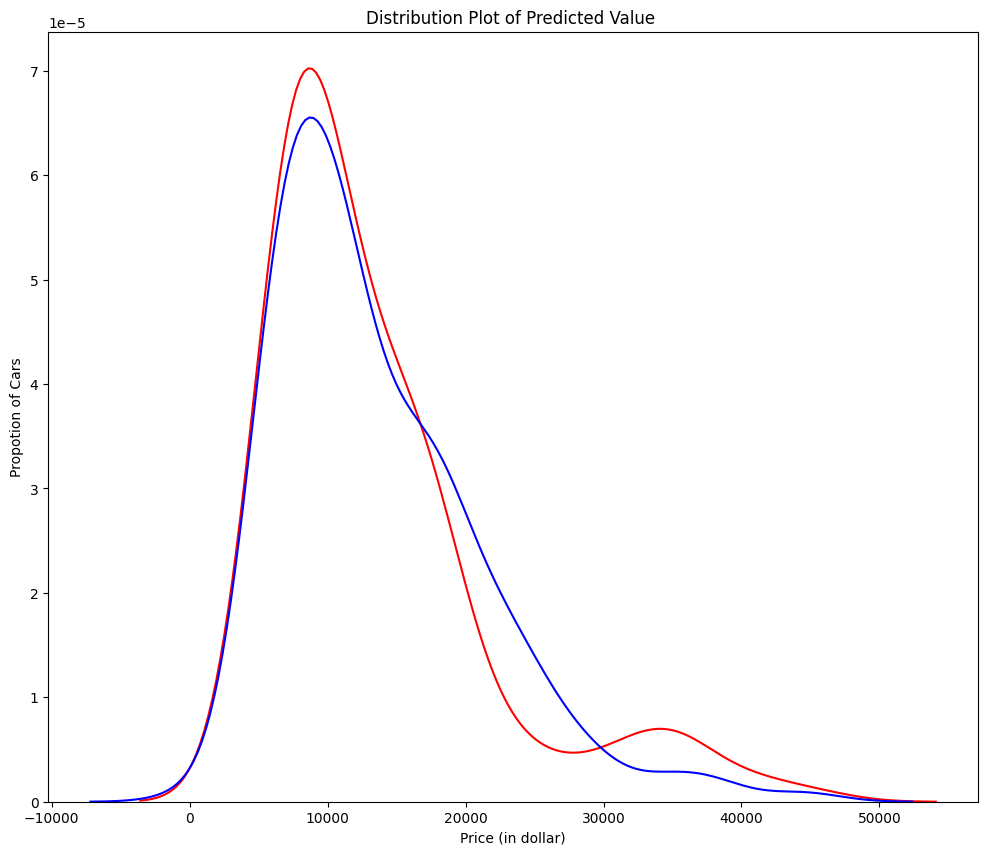

In [28]:
DistributionPlot(y_train, yhat_train, "Actual Values", "Predicted Values", "Distribution Plot of Predicted Value ")

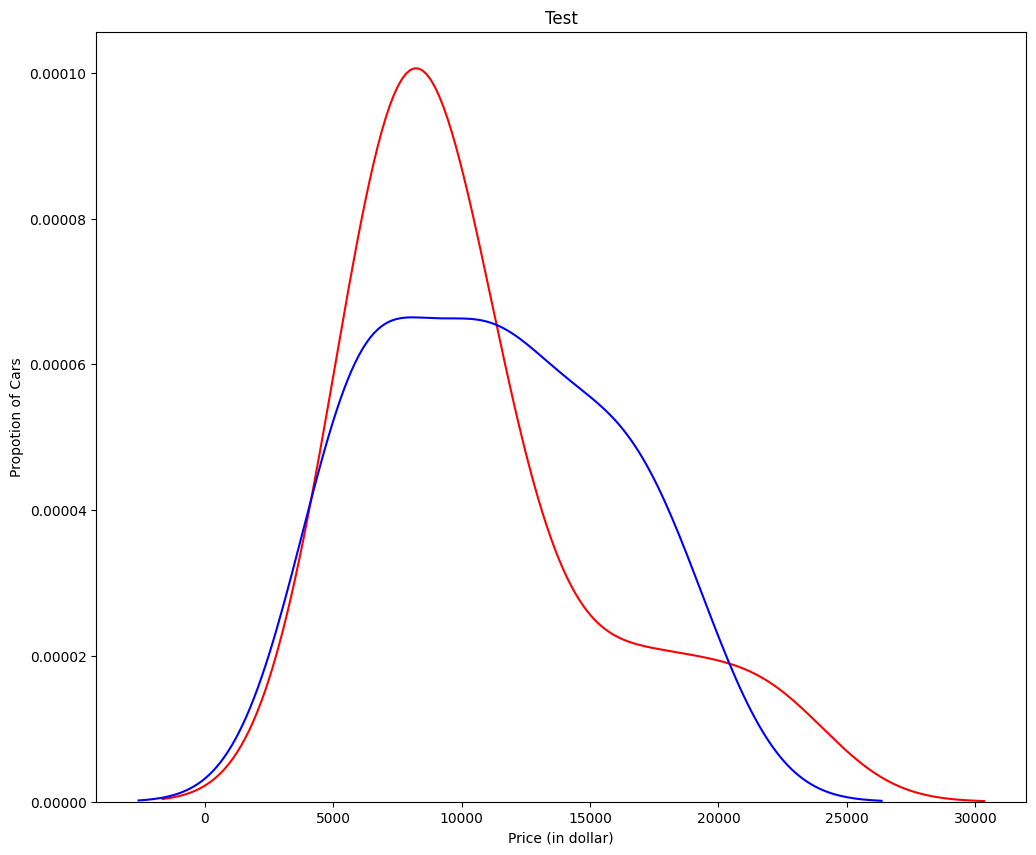

In [29]:
DistributionPlot(y_test, yhat_test, "Actual Values", "Predicted Values","Test")

## Overfitting

In [30]:
from sklearn.preprocessing import PolynomialFeatures

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [32]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [33]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [34]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [35]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


ValueError: X has 5 features, but LinearRegression is expecting 6 features as input.

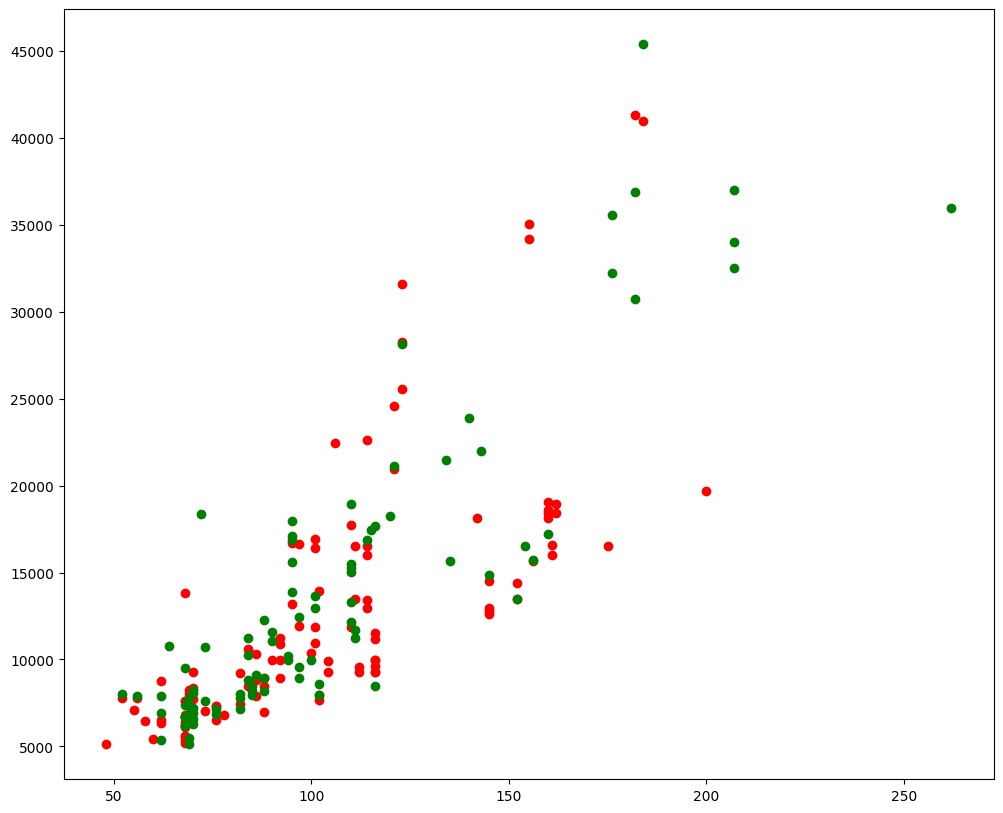

In [49]:
PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

In [43]:
poly.score(x_train_pr, y_train)

0.5567716902120254

In [44]:
poly.score(x_test_pr, y_test)

-29.871340302043684

R2가 낮을수록 안좋음 -> Overfitting의 증거

Text(3, 0.75, 'Maximum R^2 ')

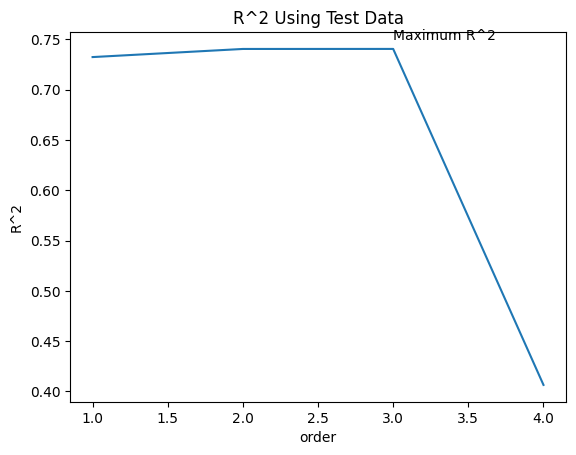

In [45]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)

    x_train_pr = pr.fit_transform(x_train[['horsepower']])

    x_test_pr = pr.fit_transform(x_test[['horsepower']])

    lr.fit(x_train_pr, y_train)

    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

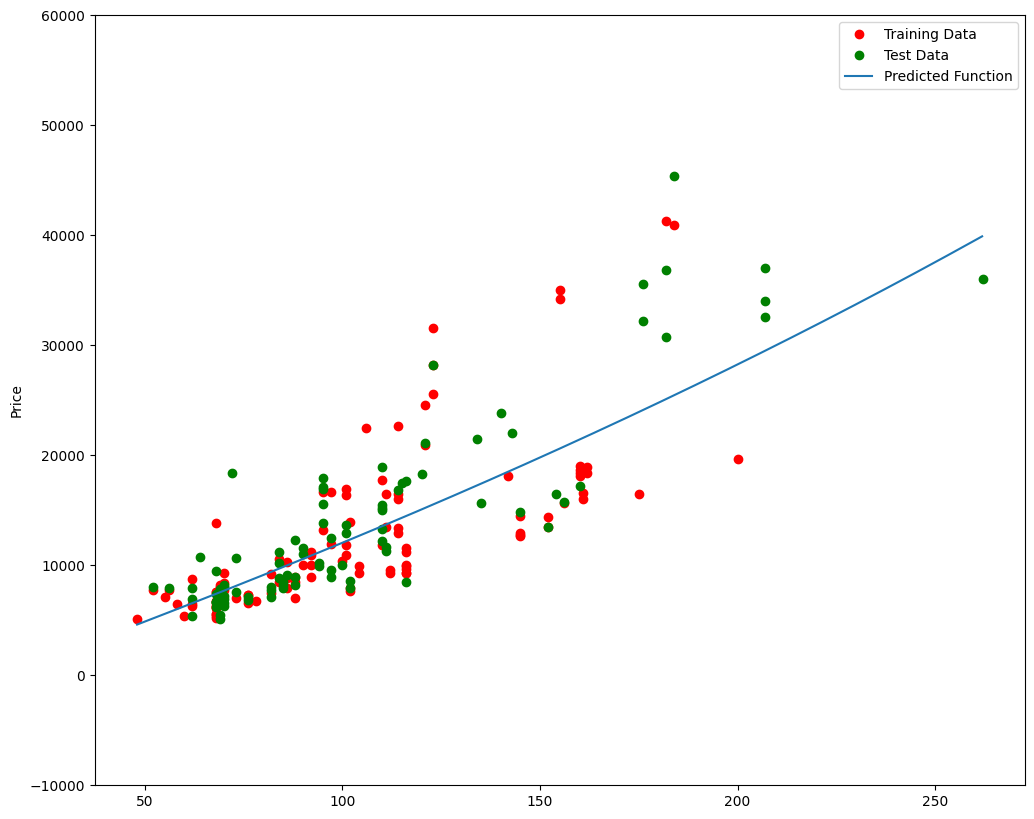

In [51]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train['horsepower'], x_test['horsepower'], y_train, y_test, poly,pr)

interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

# Ridge Regression

In [52]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [53]:
from sklearn.linear_model import Ridge

In [54]:
RigeModel=Ridge(alpha=1)

In [55]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [56]:
yhat = RigeModel.predict(x_test_pr)

In [57]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.24891471 20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [58]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0, 1000))
pbar = tqdm(Alpha)

for alpha in pbar:
  RigeModel = Ridge(alpha=alpha)
  RigeModel.fit(x_train_pr, y_train)
  test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)

  pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

  Rsqu_test.append(test_score)
  Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:06<00:00, 156.31it/s, Test Score=0.564, Train Score=0.859]


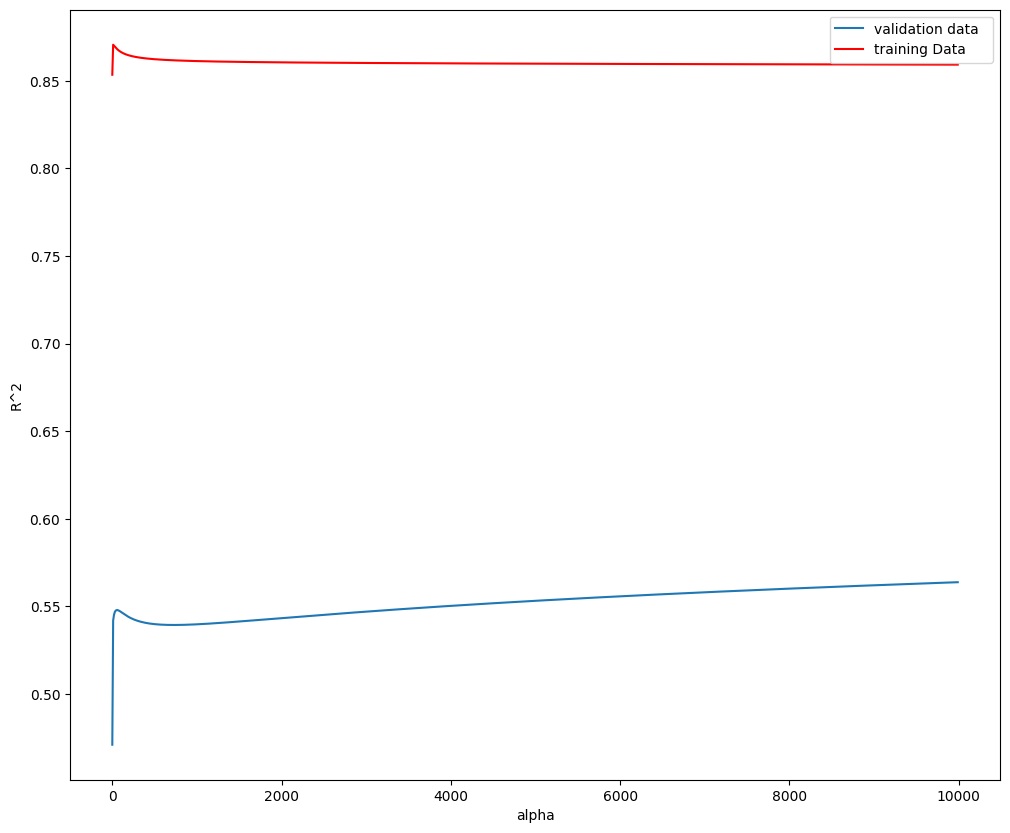

In [59]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

# Grid Search

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [62]:
RR=Ridge()
RR

Ridge()

In [63]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [64]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [65]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [66]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151